In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from env import user, password, host
import wrangle_zillow

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')


### Wrangle FIPS data in order to identify county for each data point
(refer to wrangle.py for info on how data was wrangled and cleaned)

In [2]:
county_df = wrangle_zillow.wrangle_county_fips()

In [3]:
# 3 Different Counties:  Los Angeles County, Orange County, and Ventura County
county_df

,County
fips_number,
6037,Los Angeles County
6059,Orange County
6111,Ventura County


### Wrangle zillow data
(refer to wrangle_zillow.py for info on how data was wrangled and cleaned)

In [4]:
zillow_df = wrangle_zillow.wrangle_zillow_data()

In [5]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County


#### Add property tax rate column by dividing property tax by house_value

In [8]:
zillow_df['property_tax_rate'] = (zillow_df.property_tax / zillow_df.house_value) * 100

In [9]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County,1.207256


### Change FIPS number to name of County in zillow_df DataFrame

In [11]:
la_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Los Angeles County']
orange_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Orange County']
ventura_county_tax_rates = zillow_df.property_tax_rate[zillow_df.fips == 'Ventura County']
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County,1.207256


### Data Visualizations:  Distribution of tax rates by County

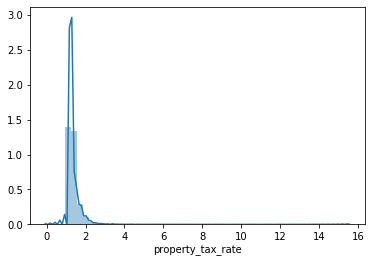

In [9]:
la_county_tax_rates_distplot = sns.distplot(la_county_tax_rates)

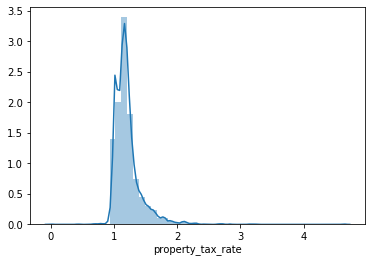

In [10]:
orange_county_tax_rates_displot = sns.distplot(orange_county_tax_rates)

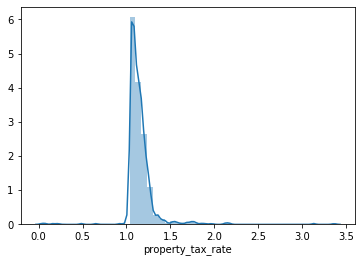

In [11]:
ventura_county_tax_rates_displot = sns.distplot(ventura_county_tax_rates)

### Split the data into train and test
(refer to split_scale.py for splitting and scaling functions)

In [12]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,property_tax,house_value,property_description,property_id,fips,property_tax_rate
0,4.0,2.0,1604.0,6089.82,498347.0,Single Family Residential,261.0,Los Angeles County,1.222004
1,3.0,3.0,2384.0,6679.55,549917.0,Single Family Residential,261.0,Los Angeles County,1.214647
2,3.0,2.0,1574.0,3876.31,235272.0,Single Family Residential,261.0,Los Angeles County,1.647587
3,2.0,2.0,1619.0,4206.15,340000.0,Single Family Residential,261.0,Los Angeles County,1.237103
4,2.0,3.0,2408.0,24353.42,2017254.0,Single Family Residential,261.0,Los Angeles County,1.207256


In [13]:
df = zillow_df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']]
X = zillow_df[['bedrooms', 'bathrooms', 'square_feet']]
y = zillow_df[['house_value']]

In [14]:
df.head()

,bedrooms,bathrooms,square_feet,house_value
0,4.0,2.0,1604.0,498347.0
1,3.0,3.0,2384.0,549917.0
2,3.0,2.0,1574.0,235272.0
3,2.0,2.0,1619.0,340000.0
4,2.0,3.0,2408.0,2017254.0


In [15]:
import split_scale

In [16]:
train, test = split_scale.split_my_data(df)

### Scaling data:

In [17]:
scaler, train_scaled, test_scaled = split_scale.iqr_robust_scaler(train, test)

In [18]:
train_scaled.head()

,bedrooms,bathrooms,square_feet,house_value
4042,0.0,0.0,0.160560,-0.708936
4860,0.0,0.0,-0.276940,0.305773
15948,1.0,0.0,0.323276,-0.679017
9861,0.0,0.0,-0.212284,-0.082540
15734,1.0,0.5,0.862069,1.036947


In [19]:
X_train_scaled = train_scaled[['bedrooms', 'bathrooms', 'square_feet']]
y_train = train[['house_value']]

In [20]:
X_test = test.drop(columns='house_value')
y_test = test[['house_value']]

In [21]:
(X_train_scaled.isnull()).sum()

bedrooms       0
bathrooms      0
square_feet    0
dtype: int64

### Exploration:

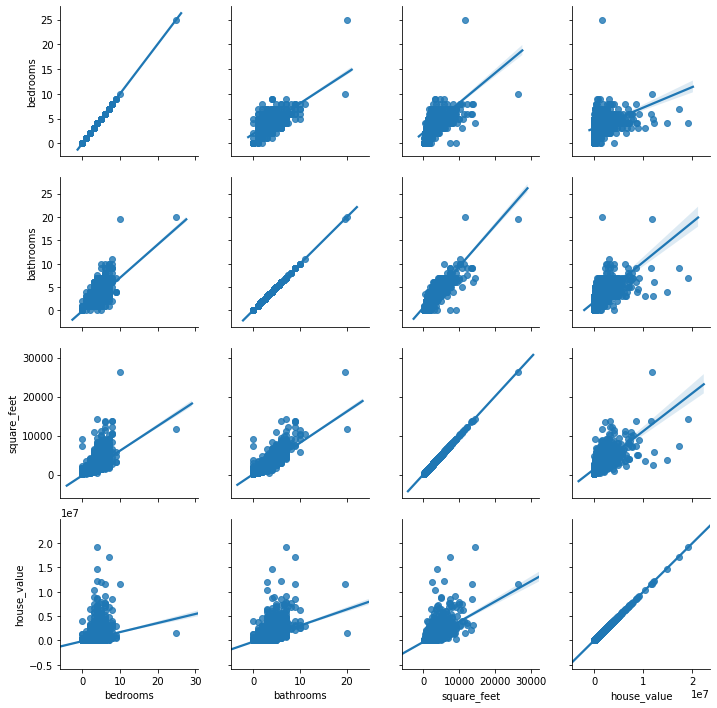

In [22]:
# explore_zillow.plot_variable_pairs(df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']])

g=sns.PairGrid(df[['bedrooms', 'bathrooms', 'square_feet', 'house_value']])
g.map(sns.regplot)
plt.show()

(0, 4)

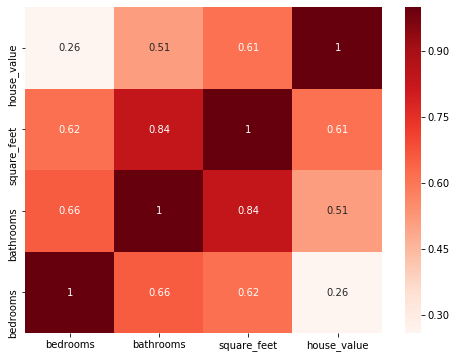

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(train_scaled.corr(), cmap='Reds', annot=True)
plt.ylim(0, 4)

In [24]:
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train_scaled)

res = sm.OLS(y_train, X_train_scaled).fit()

res.summary()

### Regression - Fitting linear model to the Zillow data

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lm1 = linear_model.BayesianRidge()

In [29]:
predictions=pd.DataFrame({'actual':y_train.house_value}).reset_index(drop=True)

lm1=LinearRegression()
lm1.fit(X_train_scaled[['bedrooms', 'bathrooms', 'square_feet']],y_train)
lm1_predictions=lm1.predict(X_train_scaled[['bedrooms', 'bathrooms', 'square_feet']])
predictions['lm1']=lm1_predictions

In [30]:
#baseline model
predictions['baseline'] = y_train.mean()[0]
predictions.head()

,actual,lm1,baseline
0,75333.0,441113.943182,458452.262282
1,423537.0,265832.601336,458452.262282
2,85600.0,367315.618559,458452.262282
3,290285.0,291736.247914,458452.262282
4,674444.0,611757.998417,458452.262282


In [31]:
lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

intercept:  [376786.55417924]
coefficients:  [[-138989.16851165   57157.31674509  400643.06707762]]


In [32]:
print('{} = b + m1 * {} + m2 * {} + m3 * {}'.format(y_train.columns[0], X_train_scaled.columns[0],X_train_scaled.columns[1],X_train_scaled.columns[2]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])
print('    coefficient (m3): %.2f' % lm1_coefficients[0][2])

house_value = b + m1 * bedrooms + m2 * bathrooms + m3 * square_feet
    y-intercept  (b): 376786.55
    coefficient (m1): -138989.17
    coefficient (m2): 57157.32
    coefficient (m3): 400643.07


In [33]:
y_pred_lm1 = lm1.predict(X_train_scaled)
y_pred_lm1

array([[441113.943182  ],
       [265832.60133555],
       [367315.61855906],
       ...,
       [359517.45646038],
       [354128.43022498],
       [321066.64591072]])

In [34]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1))

linear model
  mean squared error: 2.27e+11


In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_lm1)
r2
# print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm1))

0.40325112583494904

In [36]:
from math import sqrt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)
# print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(evs))

In [37]:
y_train = y_train.house_value

In [38]:
y_pred_lm1.ravel()

array([441113.943182  , 265832.60133555, 367315.61855906, ...,
       359517.45646038, 354128.43022498, 321066.64591072])

In [39]:
y_pred_baseline.ravel()

array([458452.26228228, 458452.26228228, 458452.26228228, ...,
       458452.26228228, 458452.26228228, 458452.26228228])

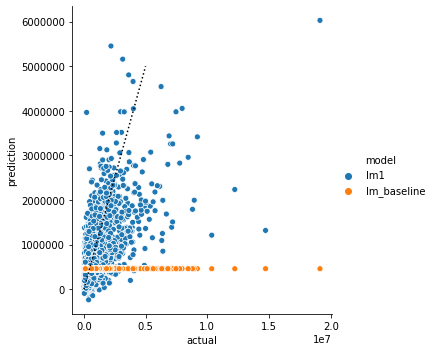

In [40]:
pd.DataFrame({'actual': y_train,
              'lm1': y_pred_lm1.ravel(),
              'lm_baseline': y_pred_baseline.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')
min = 0
max = 5_000_000
plt.plot([min, max],[min, max], c='black', ls=':')
# plt.ylim(min, max)
# plt.xlim(min, max)
# plt.title('Predicted vs Actual Final Grade')

### How much is explained by model vs how much is noise?  R2
New features;

    sqft / bedrooms
    sqft / bathrooms
    
Needed to have a model fast.  So why did I chose the features I have??  Because it was easy